In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
df=pd.read_csv("AAPL.csv",index_col="Date", parse_dates=['Date'], date_parser=dateparse)

In [3]:
df.head()

,Close
Date,
2019-01-07,147.929993
2019-01-08,150.750000
2019-01-09,153.309998
2019-01-10,153.800003
2019-01-11,152.289993


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-01-07 to 2020-01-03
Data columns (total 1 columns):
Close    251 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB


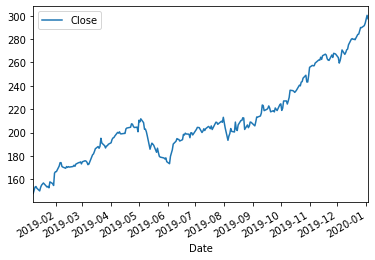

In [5]:
df.plot()

In [6]:
#Check for stationarity
rolemean=df.rolling(window=30).mean()
rolestd=df.rolling(window=30).std()
print(rolemean,rolestd)

                 Close
Date                  
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
2019-01-10         NaN
2019-01-11         NaN
2019-01-14         NaN
2019-01-15         NaN
2019-01-16         NaN
2019-01-17         NaN
2019-01-18         NaN
2019-01-22         NaN
2019-01-23         NaN
2019-01-24         NaN
2019-01-25         NaN
2019-01-28         NaN
2019-01-29         NaN
2019-01-30         NaN
2019-01-31         NaN
2019-02-01         NaN
2019-02-04         NaN
2019-02-05         NaN
2019-02-06         NaN
2019-02-07         NaN
2019-02-08         NaN
2019-02-11         NaN
2019-02-12         NaN
2019-02-13         NaN
2019-02-14         NaN
2019-02-15         NaN
2019-02-19  161.310333
...                ...
2019-11-20  250.086335
2019-11-21  251.150335
2019-11-22  252.002668
2019-11-25  253.019335
2019-11-26  253.985002
2019-11-27  255.100668
2019-11-29  256.166335
2019-12-02  257.091335
2019-12-03  257.722669
2019-12-04  258.448668
2019-12-05 

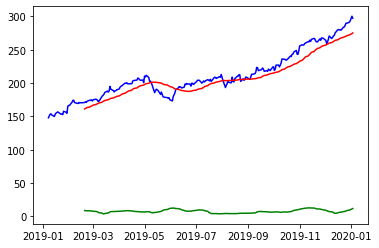

In [7]:
original=plt.plot(df,color="blue",label="original")
rolling_mean=plt.plot(rolemean,color="red", label="rolling mean")
rolling_std=plt.plot(rolestd,color="green",label="rolling std")

In [8]:
#ADF test
from statsmodels.tsa.stattools import adfuller
print("Resule from ADFC: ")
adfTest=adfuller(df["Close"],autolag="AIC")
dfOut=pd.Series(adfTest[0:4],index=["Test Stat","p-value","#lags Used","# of observation used"])
for key,value in adfTest[4].items():
    dfOut["Crtical Value ({})".format(key)]=value

print(dfOut)

Resule from ADFC: 
Test Stat                  0.470131
p-value                    0.983936
#lags Used                 0.000000
# of observation used    250.000000
Crtical Value (1%)        -3.456781
Crtical Value (5%)        -2.873172
Crtical Value (10%)       -2.572969
dtype: float64


In [9]:
df_close_log=np.log(df)

In [10]:
df_close_log

,Close
Date,
2019-01-07,4.996739
2019-01-08,5.015623
2019-01-09,5.032462
2019-01-10,5.035653
2019-01-11,5.025787
2019-01-14,5.010635
2019-01-15,5.030895
2019-01-16,5.043038
2019-01-17,5.048958


In [12]:
def test_ADFC(df):
    rolling_mean=df.rolling(window=2).mean()
    rolling_std_dev=df.rolling(window=2).std()
    original=plt.plot(df,color="blue",label="original")
    rolling_mean=plt.plot(rolemean,color="red", label="rolling mean")
    rolling_std=plt.plot(rolestd,color="green",label="rolling std")
    plt.legend()
    print("Resule from ADFC: ")
    adfTest=adfuller(df["Close"],autolag="AIC")
    dfOut=pd.Series(adfTest[0:4],index=["Test Stat","p-value","#lags Used","# of observation used"])
    for key,value in adfTest[4].items():
        dfOut["Crtical Value ({})".format(key)]=value
    return dfOut    

Resule from ADFC: 


Test Stat                 -0.486283
p-value                    0.894666
#lags Used                 0.000000
# of observation used    250.000000
Crtical Value (1%)        -3.456781
Crtical Value (5%)        -2.873172
Crtical Value (10%)       -2.572969
dtype: float64

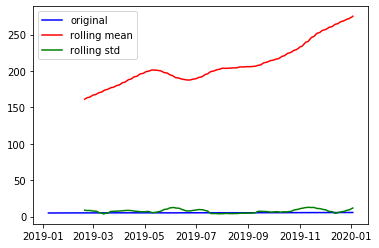

In [13]:
#ADF test
test_ADFC(df_close_log)


In [14]:
df_close_square=np.square(df)

Resule from ADFC: 


Test Stat                  1.458006
p-value                    0.997362
#lags Used                 0.000000
# of observation used    250.000000
Crtical Value (1%)        -3.456781
Crtical Value (5%)        -2.873172
Crtical Value (10%)       -2.572969
dtype: float64

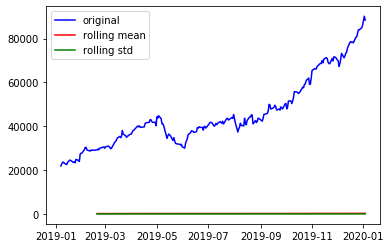

In [15]:
test_ADFC(df_close_square)

In [16]:
df_shifted= df.shift(periods=2)

In [17]:
df_shifted=df_shifted.fillna(df_shifted["Close"].mean())

Resule from ADFC: 


Test Stat                  0.216547
p-value                    0.973175
#lags Used                 0.000000
# of observation used    250.000000
Crtical Value (1%)        -3.456781
Crtical Value (5%)        -2.873172
Crtical Value (10%)       -2.572969
dtype: float64

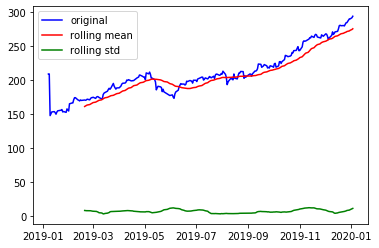

In [18]:
test_ADFC(df_shifted)

In [19]:
df_sqrt=np.sqrt(df)

Resule from ADFC: 


Test Stat                 -0.014110
p-value                    0.957349
#lags Used                 0.000000
# of observation used    250.000000
Crtical Value (1%)        -3.456781
Crtical Value (5%)        -2.873172
Crtical Value (10%)       -2.572969
dtype: float64

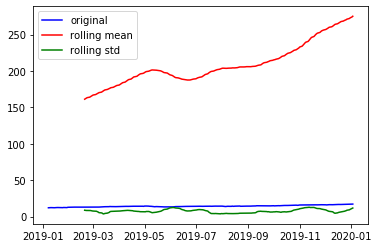

In [20]:
test_ADFC(df_sqrt)

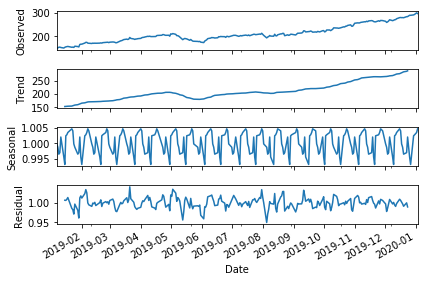

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative',freq=12)
result.plot()
plt.show()

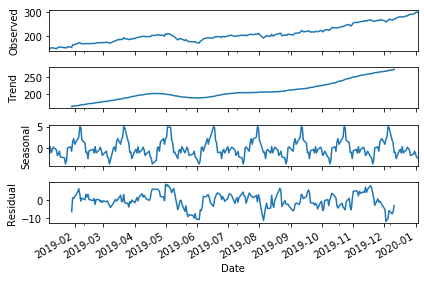

In [22]:
result_add = seasonal_decompose(df, model='addetive',freq=30)
result_add.plot()
plt.show()